In [1]:
from mdagent import MDAgent
import os 
import mdtraj as md

In [2]:
import sys
import os
parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(parent_dir)
from robustness_prompts import get_prompt

prompt_10_descriptive = get_prompt("descriptive", 10)
prompt_10_natural = get_prompt("natural", 10)

prompt_10_descriptive, prompt_10_natural

('Complete all of the following tasks: 1. Download the PDB file 1LYZ. 2. Report the secondary structure assignments of the downloaded PDB structure. 3. Find any known binding or active sites. 4. Simulate for 1ps at 300 K. 5. Compute the RMSD. 6. Compute the radius of gyration over time. 7. Compute the SASA (solvent accessible surface area). 8. Simulate for 1ps at 400K. 9. Compute the RMSD of the 400K simulation. 10. Compute the radius of gyration over time for the 400K simulation.',
 'Simulate 1LYZ for 1ps at 300 K and for 1ps at 400K. Report the secondary structure assignments of the downloaded PDB structure and any known binding or active sites. Compute RMSD and radius of gyration of both simulations. Compute SASA for the 300K simulation.')

In [3]:
llm_model = "gpt-4o-2024-08-06"
tools = "all"

In [4]:
agent_1 = MDAgent(agent_type="Structured", model=llm_model, top_k_tools=tools, use_memory=False)
agent_1.run(prompt_10_descriptive)

Thought: To complete the tasks, I will proceed step by step using the appropriate tools. First, I will download the PDB file for 1LYZ.

Action:
```json
{
  "action": "PDBFileDownloader",
  "action_input": "1LYZ"
}
```PDB file found with this ID: 1LYZ
Action:
```json
{
  "action": "ComputeDSSP",
  "action_input": {
    "traj_file": "1LYZ_025635",
    "target_frames": "first"
  }
}
```Action:
```json
{
  "action": "GetAllKnownSites",
  "action_input": {
    "query": "1LYZ",
    "primary_accession": ""
  }
}
```To continue with the tasks, I will now proceed to set up and run a short simulation of the protein 1LYZ for 1 picosecond at 300 K. After that, I will compute the RMSD and the radius of gyration over time for this simulation.

Action:
```json
{
  "action": "SetUpandRunFunction",
  "action_input": {
    "pdb_id": "1LYZ_025635",
    "forcefield_files": ["amber99sb.xml", "tip3p.xml"],
    "save": true,
    "system_params": {
      "nonbondedMethod": "NoCutoff",
      "constraints": "No

({'input': '\n    You are an expert molecular dynamics scientist, and\n    your task is to respond to the question or\n    solve the problem to the best of your ability using\n    the provided tools.\n\n    You can only respond with a single complete\n    \'Thought, Action, Action Input\' format\n    OR a single \'Final Answer\' format.\n\n    Complete format:\n    Thought: (reflect on your progress and decide what to do next)\n    Action:\n    ```\n    {\n        "action": (the action name, it should be the name of a tool),\n        "action_input": (the input string for the action)\n    }\n    \'\'\'\n\n    OR\n\n    Final Answer: (the final response to the original input\n    question, once all steps are complete)\n\n    You are required to use the tools provided,\n    using the most specific tool\n    available for each action.\n    Your final answer should contain all information\n    necessary to answer the question and its subquestions.\n    Before you finish, reflect on your pro

<Figure size 640x480 with 0 Axes>

In [5]:
registry_1 = agent_1.path_registry
print(registry_1.list_path_names_and_descriptions().replace(",", "\n"))

Files found in registry: 1LYZ_025635: PDB file downloaded from RSCB
 PDBFile ID: 1LYZ_025635
 rec0_025636: dssp values for trajectory with id: 1LYZ_025635
 1LYZ_025650: Cleaned File:  Removed Heterogens
 and Water Removed.  Replaced Nonstandard Residues. Added Hydrogens at pH 7.0. Missing Atoms Added and replaces nonstandard residues. 
 top_sim0_025654: Initial positions for simulation sim0_025654
 sim0_025654: Basic Simulation of Protein 1LYZ_025650
 rec0_025655: Simulation trajectory for protein 1LYZ_025650 and simulation sim0_025654
 rec1_025655: Simulation state log for protein 1LYZ_025650 and simulation sim0_025654
 rec2_025655: Simulation pdb frames for protein 1LYZ_025650 and simulation sim0_025654
 rmsd_025654: RMSD for 025654
 fig0_025707: RMSD plot for 025654
 rgy_rec0_025655: Radii of gyration per frame for rec0_025655
 fig0_025711: Plot of radii of gyration over time for rec0_025655
 top_sim0_025715: Initial positions for simulation sim0_025715
 sim0_025715: Basic Simulatio

In [6]:
# make sure pdb was downloaded
assert os.path.exists(registry_1.get_mapped_path("1LYZ_025635"))

In [17]:
# make sure dssp was computed correctly
from mdagent.tools.base_tools import ComputeDSSP

dssp = ComputeDSSP(registry_1)
dssp._run(traj_file= "1LYZ_025635", target_frames="first")

"{'residues in helix': 50, 'residues in strand': 14, 'residues in coil': 65, 'residues not assigned, not a protein residue': 101}"

In [16]:
# make sure the sites were found
from mdagent.tools.base_tools import GetAllKnownSites

get_all_known_sites = GetAllKnownSites()
get_all_known_sites._run(query="1LYZ", primary_accession="")

"Active Sites: [{'start': 53, 'start_modifier': 'EXACT', 'end': 53, 'end_modifier': 'EXACT', 'description': '', 'evidences': [{'evidenceCode': 'ECO:0000255', 'source': 'PROSITE-ProRule', 'id': 'PRU00680'}]}, {'start': 71, 'start_modifier': 'EXACT', 'end': 71, 'end_modifier': 'EXACT', 'description': '', 'evidences': [{'evidenceCode': 'ECO:0000255', 'source': 'PROSITE-ProRule', 'id': 'PRU00680'}]}]\nNo known binding sites.\nNo other relevant sites."

In [15]:
# make sure trajectory and topology exist (sim1)
traj_path_1_1 = registry_1.get_mapped_path("rec0_025655")
top_path_1_1 = registry_1.get_mapped_path("top_sim0_025654")

assert os.path.exists(traj_path_1_1)
assert os.path.exists(top_path_1_1)

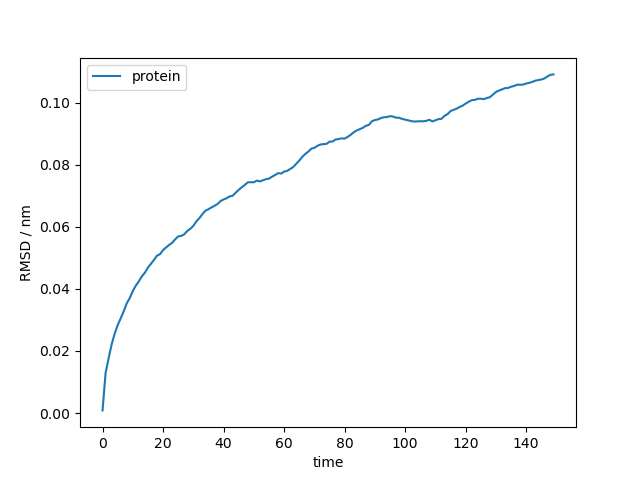

In [14]:
# make sure rmsd plot was generated (sim1)
from IPython.display import Image
Image(filename=registry_1.get_mapped_path('fig0_025707'))

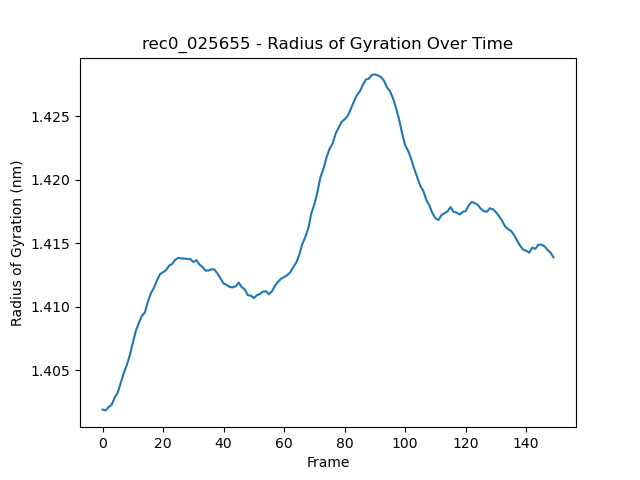

In [13]:
# make sure rgy plot was generated (sim1)
from IPython.display import Image
Image(filename=registry_1.get_mapped_path('fig0_025711'))

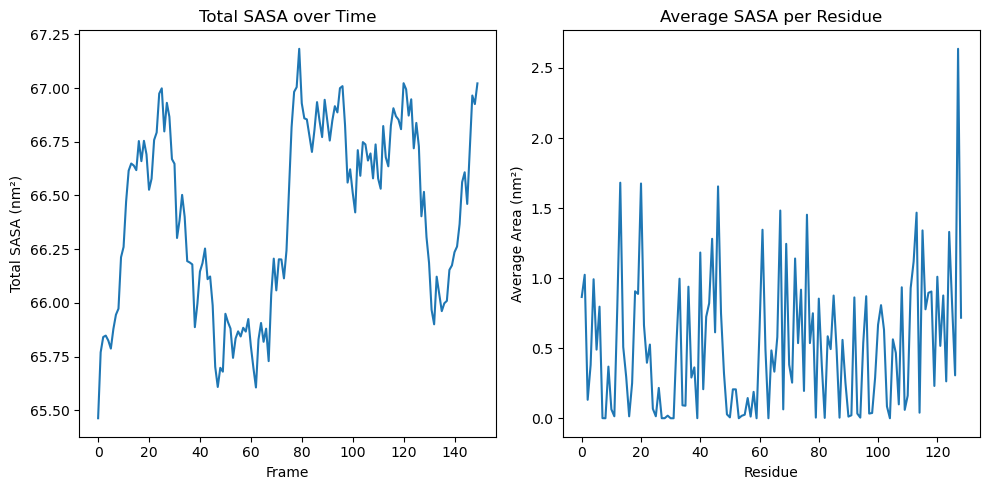

In [12]:
# make sure sasa plot was generated (sim1)
from IPython.display import Image
Image(filename=registry_1.get_mapped_path('fig0_025745'))

In [11]:
# make sure trajectory and topology exist (sim2)
traj_path_1_2 = registry_1.get_mapped_path("rec0_025715")
top_path_1_2 = registry_1.get_mapped_path("top_sim0_025715")

assert os.path.exists(traj_path_1_2)
assert os.path.exists(top_path_1_2)

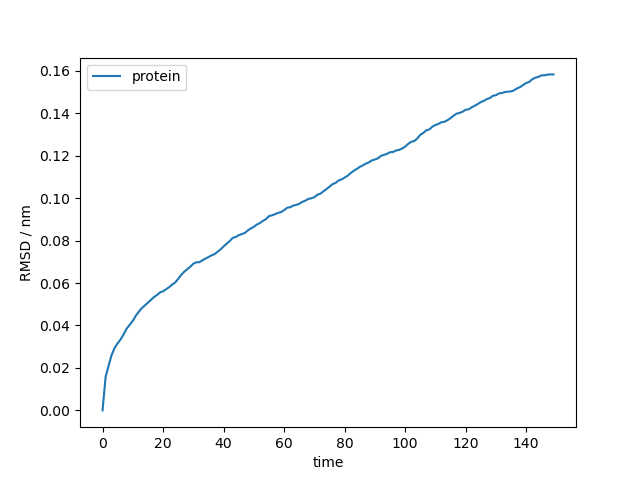

In [10]:
# make sure rmsd plot was generated (sim2)
from IPython.display import Image
Image(filename=registry_1.get_mapped_path('fig0_025727'))

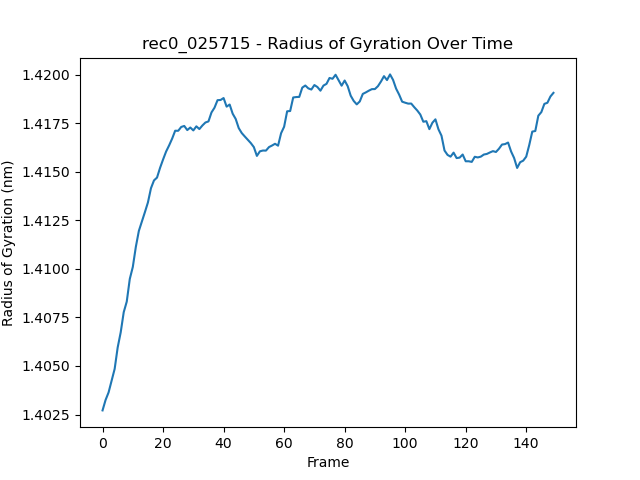

In [9]:
# make sure rgy plot was generated (sim2)
from IPython.display import Image
Image(filename=registry_1.get_mapped_path('fig0_025729'))

In [18]:
agent_2 = MDAgent(agent_type="Structured", model=llm_model, top_k_tools=tools, use_memory=False)
agent_2.run(prompt_10_natural)

Thought: To address the question, I need to perform several tasks: download the PDB file for 1LYZ, set up and run simulations at 300K and 400K, compute secondary structure assignments, identify known binding or active sites, compute RMSD and radius of gyration for both simulations, and compute SASA for the 300K simulation. I'll start by downloading the PDB file for 1LYZ.

Action:
```json
{
  "action": "PDBFileDownloader",
  "action_input": "1LYZ"
}
```PDB file found with this ID: 1LYZ
Thought: Now that I have the PDB file for 1LYZ, I will proceed to set up and run the simulations at 300K and 400K. I will first set up the simulation at 300K.

Action:
```json
{
  "action": "SetUpandRunFunction",
  "action_input": {
    "pdb_id": "1LYZ_030015",
    "forcefield_files": ["amber99sb.xml", "tip3p.xml"],
    "save": true,
    "system_params": {
      "nonbondedMethod": "NoCutoff",
      "constraints": "None",
      "rigidWater": false
    },
    "integrator_params": {
      "integrator_type": 

({'input': '\n    You are an expert molecular dynamics scientist, and\n    your task is to respond to the question or\n    solve the problem to the best of your ability using\n    the provided tools.\n\n    You can only respond with a single complete\n    \'Thought, Action, Action Input\' format\n    OR a single \'Final Answer\' format.\n\n    Complete format:\n    Thought: (reflect on your progress and decide what to do next)\n    Action:\n    ```\n    {\n        "action": (the action name, it should be the name of a tool),\n        "action_input": (the input string for the action)\n    }\n    \'\'\'\n\n    OR\n\n    Final Answer: (the final response to the original input\n    question, once all steps are complete)\n\n    You are required to use the tools provided,\n    using the most specific tool\n    available for each action.\n    Your final answer should contain all information\n    necessary to answer the question and its subquestions.\n    Before you finish, reflect on your pro

<Figure size 640x480 with 0 Axes>

In [19]:
registry_2 = agent_2.path_registry
print(registry_2.list_path_names_and_descriptions().replace(",", "\n"))

Files found in registry: 1LYZ_030015: PDB file downloaded from RSCB
 PDBFile ID: 1LYZ_030015
 1LYZ_030026: Cleaned File:  Removed Heterogens
 and Water Removed.  Replaced Nonstandard Residues. Added Hydrogens at pH 7.0. Missing Atoms Added and replaces nonstandard residues. 
 top_sim0_030030: Initial positions for simulation sim0_030030
 sim0_030030: Basic Simulation of Protein 1LYZ_030026
 rec0_030030: Simulation trajectory for protein 1LYZ_030026 and simulation sim0_030030
 rec1_030030: Simulation state log for protein 1LYZ_030026 and simulation sim0_030030
 rec2_030030: Simulation pdb frames for protein 1LYZ_030026 and simulation sim0_030030
 top_sim0_030046: Initial positions for simulation sim0_030046
 sim0_030046: Basic Simulation of Protein 1LYZ_030026
 rec0_030046: Simulation trajectory for protein 1LYZ_030026 and simulation sim0_030046
 rec1_030046: Simulation state log for protein 1LYZ_030026 and simulation sim0_030046
 rec2_030046: Simulation pdb frames for protein 1LYZ_0300

In [24]:
# make sure pdb was downloaded
assert os.path.exists(registry_2.get_mapped_path("1LYZ_030015"))

In [25]:
# make sure dssp was computed correctly
from mdagent.tools.base_tools import ComputeDSSP

dssp = ComputeDSSP(registry_2)
dssp._run(traj_file= "1LYZ_030015", target_frames="first")

"{'residues in helix': 50, 'residues in strand': 14, 'residues in coil': 65, 'residues not assigned, not a protein residue': 101}"

In [26]:
# make sure the sites were found
from mdagent.tools.base_tools import GetAllKnownSites

get_all_known_sites = GetAllKnownSites()
get_all_known_sites._run(query="1LYZ", primary_accession="")

"Active Sites: [{'start': 53, 'start_modifier': 'EXACT', 'end': 53, 'end_modifier': 'EXACT', 'description': '', 'evidences': [{'evidenceCode': 'ECO:0000255', 'source': 'PROSITE-ProRule', 'id': 'PRU00680'}]}, {'start': 71, 'start_modifier': 'EXACT', 'end': 71, 'end_modifier': 'EXACT', 'description': '', 'evidences': [{'evidenceCode': 'ECO:0000255', 'source': 'PROSITE-ProRule', 'id': 'PRU00680'}]}]\nNo known binding sites.\nNo other relevant sites."

In [27]:
# make sure trajectory and topology exist (sim1)
traj_path_2_1 = registry_2.get_mapped_path("rec0_030046")
top_path_2_1 = registry_2.get_mapped_path("top_sim0_030046")

assert os.path.exists(traj_path_2_1)
assert os.path.exists(top_path_2_1)

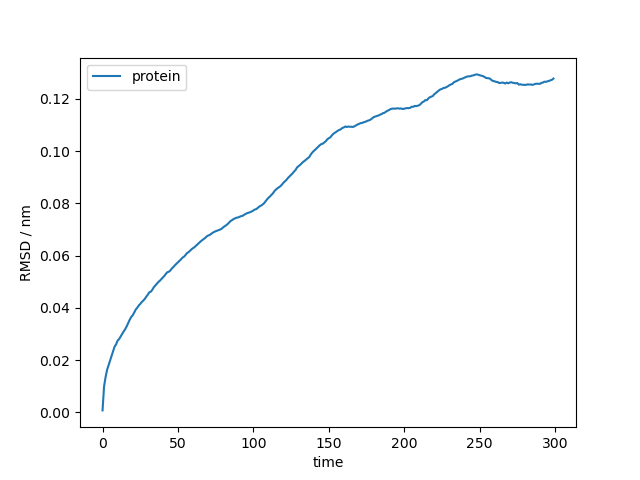

In [28]:
# make sure rmsd plot was generated (sim1)
from IPython.display import Image
Image(filename=registry_2.get_mapped_path('fig0_030109'))

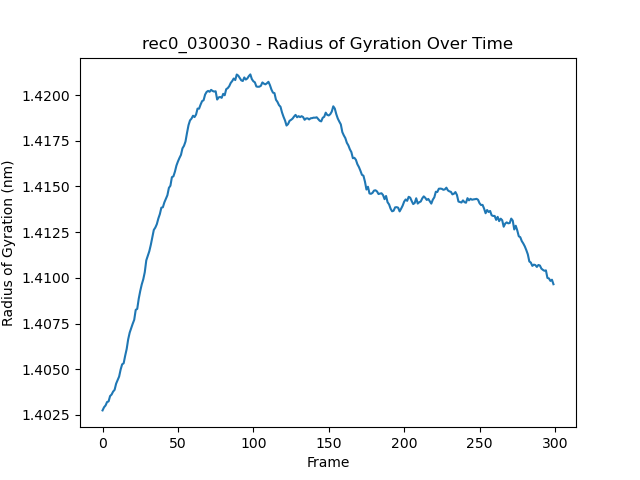

In [29]:
# make sure rgy plot was generated (sim1)
from IPython.display import Image
Image(filename=registry_2.get_mapped_path('fig0_030112'))

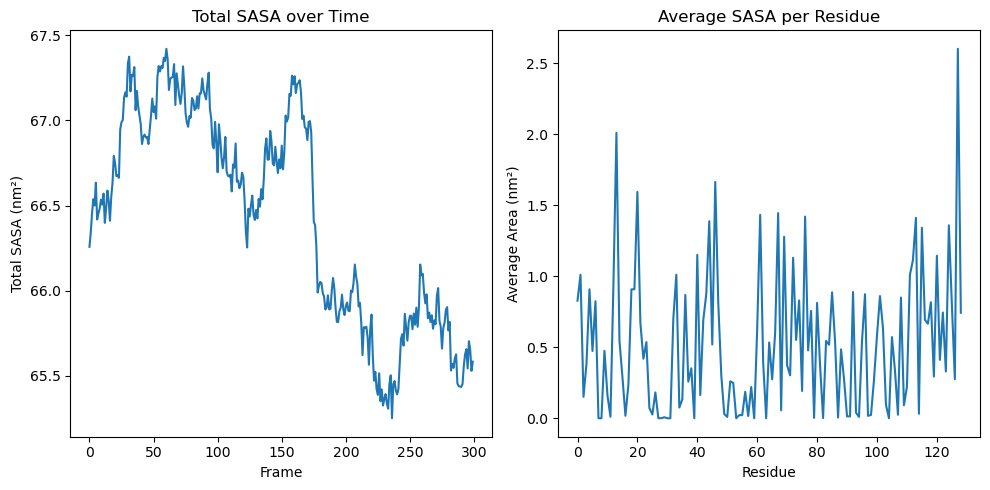

In [30]:
# make sure sasa plot was generated (sim1)
from IPython.display import Image
Image(filename=registry_2.get_mapped_path('fig0_030148'))

In [31]:
# make sure trajectory and topology exist (sim2)
traj_path_2_2 = registry_2.get_mapped_path("rec0_030046")
top_path_2_2 = registry_2.get_mapped_path("top_sim0_030046")

assert os.path.exists(traj_path_2_2)
assert os.path.exists(top_path_2_2)

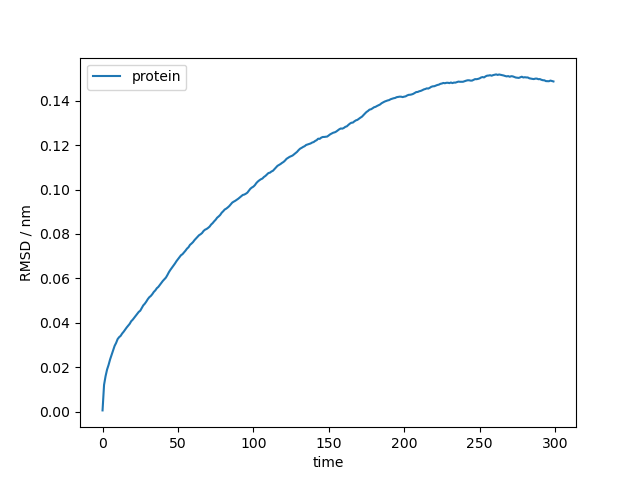

In [32]:
# make sure rmsd plot was generated (sim2)
from IPython.display import Image
Image(filename=registry_2.get_mapped_path('fig0_030116'))

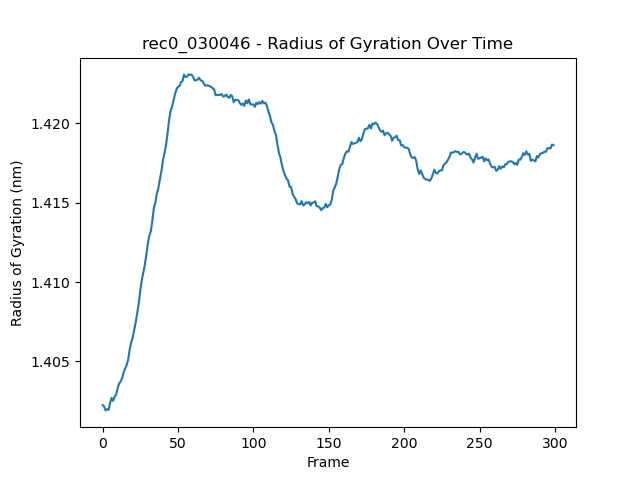

In [33]:
# make sure rgy plot was generated (sim2)
from IPython.display import Image
Image(filename=registry_2.get_mapped_path('fig0_030119'))